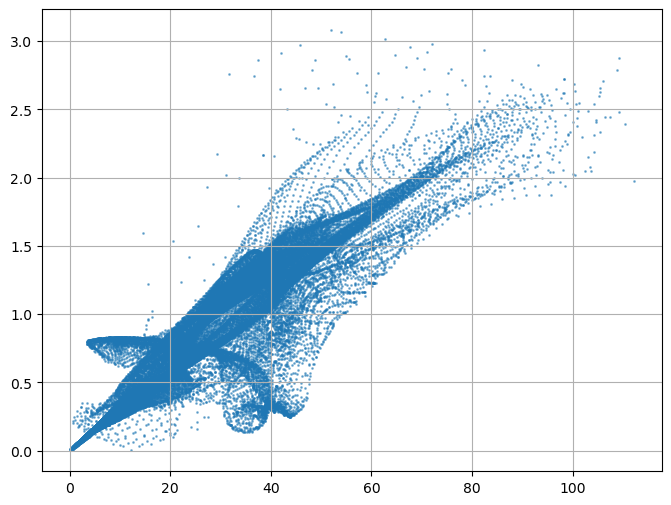

In [2]:
defl_file1 = '../data/JF12_GMFdeflection_Z1_E10EeV.csv'
defl_file2 = '../data/deflexionZ2E510_R2_ra_dec_deg.txt'

import matplotlib.pyplot as plt
from astropy.table import Table
from astropy.io import ascii

defl1 = ascii.read(defl_file1)
defl2 = ascii.read(defl_file2)

plt.figure(figsize=(8, 6))
plt.scatter(defl1['deflection'], defl2['deflexion'], s=1, alpha=0.5)
plt.grid(True)
plt.show()


/tmp/ipykernel_8274/2469791438.py:15: HealpyDeprecationWarning: "verbose" was deprecated in version 1.15.0 and will be removed in a future version. 
  dmap = hp.smoothing(dmap, fwhm=np.radians(fwhm_deg), verbose=False)


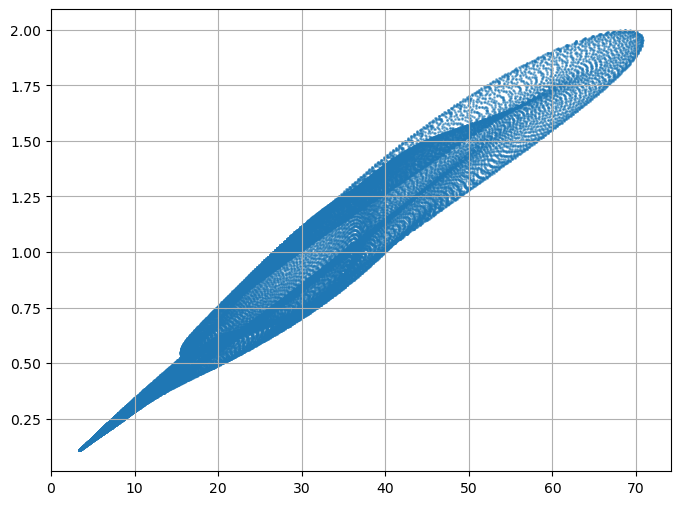

In [12]:
def load_deflection_map(defl_file, fwhm_deg):
    import numpy as np
    import healpy as hp
    data = ascii.read(defl_file)
    pixel_ids = np.asarray(data['pixid'], dtype=int)
    try:
        deflection_data = np.asarray(data['deflection'], dtype=float)
    except KeyError:
        deflection_data = np.asarray(data['deflexion'], dtype=float)
    npix = int(np.max(pixel_ids)) + 1
    nside = hp.npix2nside(npix)
    dmap = np.full(npix, hp.UNSEEN, dtype=float)
    dmap[pixel_ids] = deflection_data
    if fwhm_deg and fwhm_deg > 0:
        dmap = hp.smoothing(dmap, fwhm=np.radians(fwhm_deg), verbose=False)
    return dmap, nside

defl1 = load_deflection_map(defl_file1, fwhm_deg=30.0)
defl2 = load_deflection_map(defl_file2, fwhm_deg=30.0)

plt.figure(figsize=(8, 6))
plt.scatter(defl1[0], defl2[0], s=1, alpha=0.5)
plt.grid(True)
plt.show()


/tmp/ipykernel_4101/1425750635.py:18: HealpyDeprecationWarning: "verbose" was deprecated in version 1.15.0 and will be removed in a future version. 
  dmap = hp.smoothing(dmap, fwhm=np.radians(fwhm_deg), verbose=False)


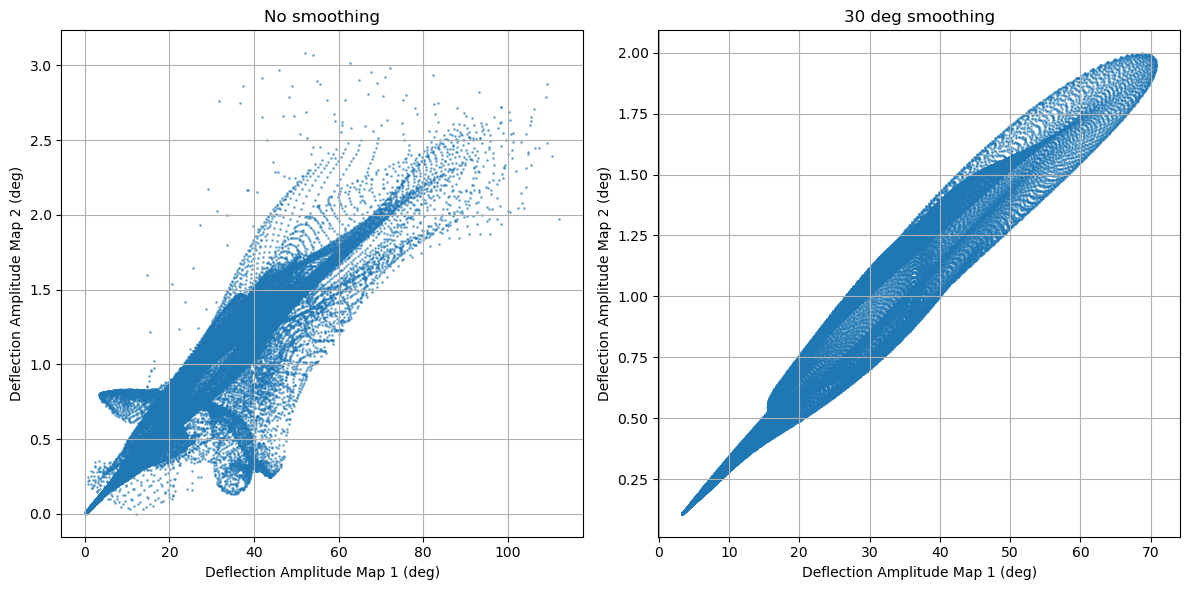

In [8]:
# Make a 2x1 scatter plot with both maps
# showing the two different smoothings
def load_deflection_map(defl_file, fwhm_deg):
    import numpy as np
    import healpy as hp
    from astropy.io import ascii
    data = ascii.read(defl_file)
    pixel_ids = np.asarray(data['pixid'], dtype=int)
    try:
        deflection_data = np.asarray(data['deflection'], dtype=float)
    except KeyError:
        deflection_data = np.asarray(data['deflexion'], dtype=float)
    npix = int(np.max(pixel_ids)) + 1
    nside = hp.npix2nside(npix)
    dmap = np.full(npix, hp.UNSEEN, dtype=float)
    dmap[pixel_ids] = deflection_data
    if fwhm_deg and fwhm_deg > 0:
        dmap = hp.smoothing(dmap, fwhm=np.radians(fwhm_deg), verbose=False)
    return dmap, nside

defl_file1 = '../data/JF12_GMFdeflection_Z1_E10EeV.csv'
defl_file2 = '../data/deflexionZ2E510_R2_ra_dec_deg.txt'

import matplotlib.pyplot as plt
fig = plt.figure(figsize=(12, 6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
dmap1_smooth = load_deflection_map(defl_file1, fwhm_deg=0.0)[0]
dmap2_smooth = load_deflection_map(defl_file2, fwhm_deg=0.0)[0]
ax1.scatter(dmap1_smooth, dmap2_smooth, s=1, alpha=0.5)
ax1.set_title('No smoothing')
dmap1_smooth = load_deflection_map(defl_file1, fwhm_deg=30.0)[0]
dmap2_smooth = load_deflection_map(defl_file2, fwhm_deg=30.0)[0]
ax2.scatter(dmap1_smooth, dmap2_smooth, s=1, alpha=0.5)
ax2.set_title('30 deg smoothing')
ax1.grid(True)
ax2.grid(True)
for ax in [ax1, ax2]:
    ax.set_xlabel('Deflection Amplitude Map 1 (deg)')
    ax.set_ylabel('Deflection Amplitude Map 2 (deg)')
plt.tight_layout()
plt.show()



/tmp/ipykernel_10936/3058072867.py:18: HealpyDeprecationWarning: "verbose" was deprecated in version 1.15.0 and will be removed in a future version. 
  dmap = hp.smoothing(dmap, fwhm=np.radians(fwhm_deg), verbose=False)


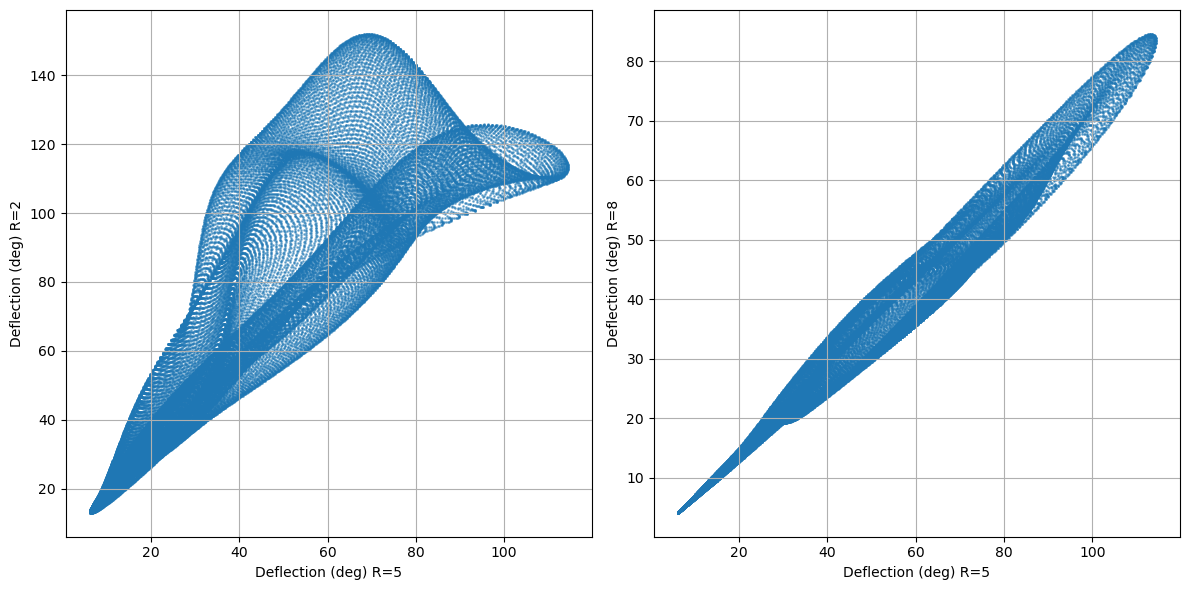

In [6]:
def load_deflection_map(rigidity, defl_file, fwhm_deg):
    """Load and smooth deflection map."""
    data = ascii.read(defl_file)
    if defl_file=='../data/deflexiones_R2R5R8_final.txt':
        # add pixid column that starts at 0
        data['pixid'] = np.arange(len(data))
        pixel_ids = np.asarray(data['pixid'], dtype=int)
    else:
        pixel_ids = np.asarray(data['pixid'], dtype=int)
    deflection_data = np.asarray(data[f'deflexion(deg)_R{int(rigidity)}'], dtype=float)
    
    npix = int(np.max(pixel_ids)) + 1
    nside = hp.npix2nside(npix)
    dmap = np.full(npix, hp.UNSEEN, dtype=float)
    dmap[pixel_ids] = deflection_data
    
    if fwhm_deg and fwhm_deg > 0:
        dmap = hp.smoothing(dmap, fwhm=np.radians(fwhm_deg), verbose=False)
    
    return dmap, nside

import numpy as np
import healpy as hp
from astropy.io import ascii
import matplotlib.pyplot as plt

defl_file = '../data/deflexiones_R2R5R8_final.txt'
rigidity = 5  # Example rigidity value
dmap, nside = load_deflection_map(rigidity, defl_file, fwhm_deg=30.0)

fig = plt.figure(figsize=(12, 6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
dmap_R2_smooth = load_deflection_map(rigidity=2, defl_file=defl_file, fwhm_deg=30.0)[0]
dmap_R5_smooth = load_deflection_map(rigidity=5, defl_file=defl_file, fwhm_deg=30.0)[0]
dmap_R8_smooth = load_deflection_map(rigidity=8, defl_file=defl_file, fwhm_deg=30.0)[0]
ax1.scatter(dmap_R5_smooth, dmap_R2_smooth, s=1, alpha=0.5)
#ax1.set_title('R5 vs R2')
ax1.set_ylabel('Deflection (deg) R=2')

ax2.scatter(dmap_R5_smooth, dmap_R8_smooth, s=1, alpha=0.5)
#ax2.set_title('R5 vs R8')
ax2.set_ylabel('Deflection (deg) R=8')

ax1.grid(True)
ax2.grid(True)
for ax in [ax1, ax2]:
    ax.set_xlabel('Deflection (deg) R=5')

    # # plot unity line
    # lims = [
    #     np.min(ax.get_xlim()),  # min of both axes
    #     np.max(ax.get_xlim()),  # max of both axes
    # ]
    # ax.plot(lims, lims, 'k--', alpha=0.75, zorder=0)

plt.tight_layout()
plt.savefig('../plots/deflection_scatter_R2R5R8.png', dpi=150)
plt.show()


### 2x2 plot, with and without smoothing

/tmp/ipykernel_8463/2542558406.py:18: HealpyDeprecationWarning: "verbose" was deprecated in version 1.15.0 and will be removed in a future version. 
  dmap = hp.smoothing(dmap, fwhm=np.radians(fwhm_deg), verbose=False)


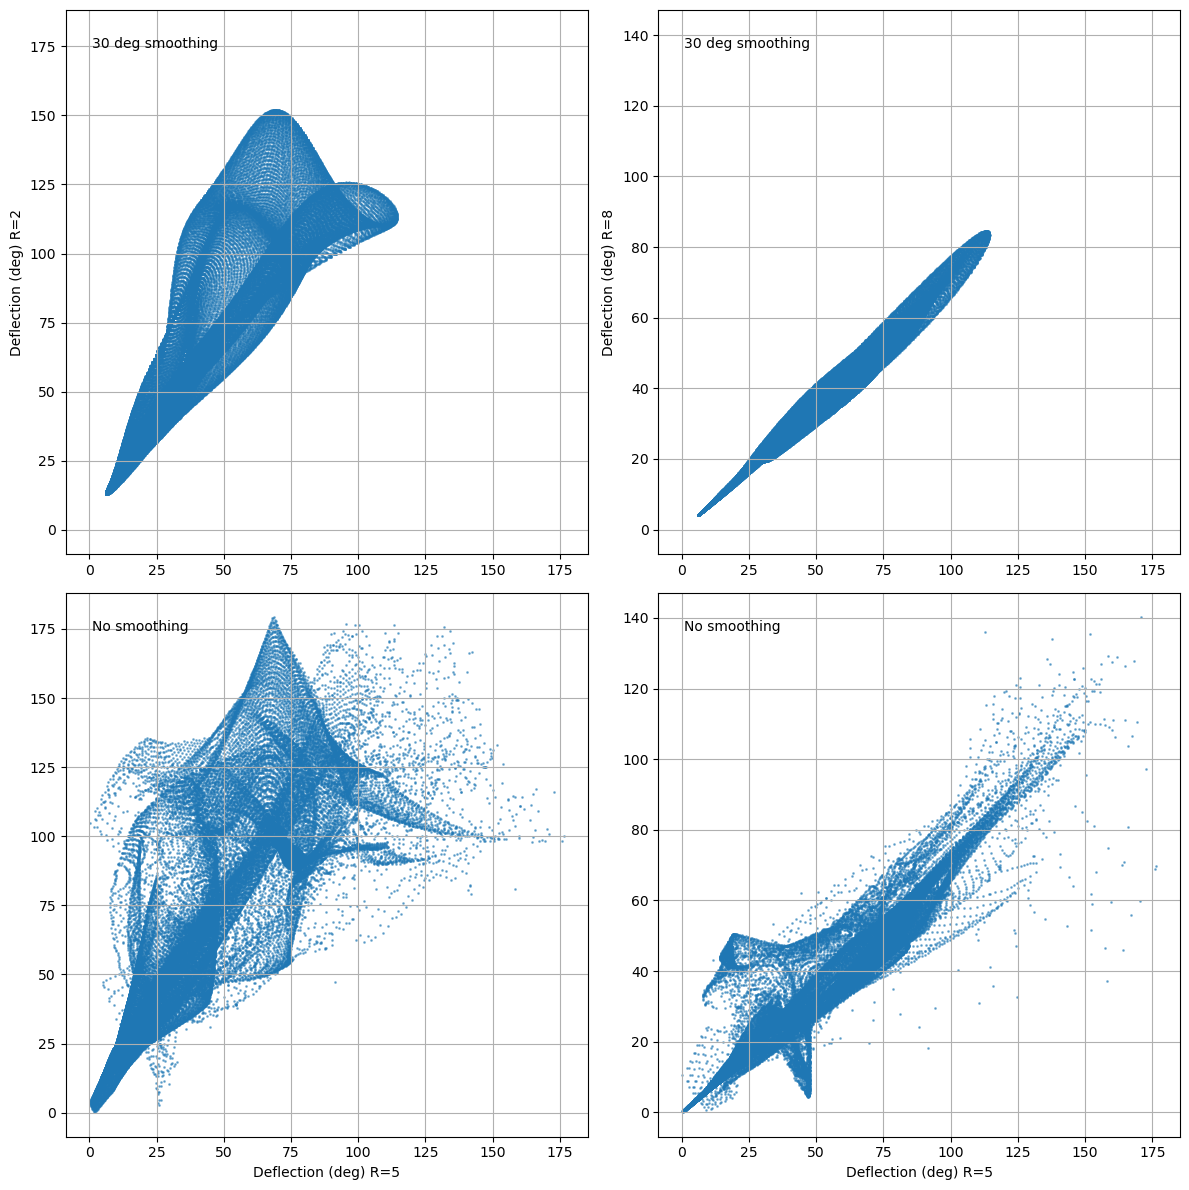

In [4]:
def load_deflection_map(rigidity, defl_file, fwhm_deg):
    """Load and smooth deflection map."""
    data = ascii.read(defl_file)
    if defl_file=='../data/deflexiones_R2R5R8_final.txt':
        # add pixid column that starts at 0
        data['pixid'] = np.arange(len(data))
        pixel_ids = np.asarray(data['pixid'], dtype=int)
    else:
        pixel_ids = np.asarray(data['pixid'], dtype=int)
    deflection_data = np.asarray(data[f'deflexion(deg)_R{int(rigidity)}'], dtype=float)
    
    npix = int(np.max(pixel_ids)) + 1
    nside = hp.npix2nside(npix)
    dmap = np.full(npix, hp.UNSEEN, dtype=float)
    dmap[pixel_ids] = deflection_data
    
    if fwhm_deg and fwhm_deg > 0:
        dmap = hp.smoothing(dmap, fwhm=np.radians(fwhm_deg), verbose=False)
    
    return dmap, nside

import numpy as np
import healpy as hp
from astropy.io import ascii
import matplotlib.pyplot as plt

defl_file = '../data/deflexiones_R2R5R8_final.txt'
rigidity = 5  # Example rigidity value
dmap, nside = load_deflection_map(rigidity, defl_file, fwhm_deg=30.0)

fig = plt.figure(figsize=(12, 12))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223, sharex=ax1, sharey=ax1)
ax4 = fig.add_subplot(224, sharex=ax2, sharey=ax2)
dmap_R2_smooth = load_deflection_map(rigidity=2, defl_file=defl_file, fwhm_deg=30.0)[0]
dmap_R5_smooth = load_deflection_map(rigidity=5, defl_file=defl_file, fwhm_deg=30.0)[0]
dmap_R8_smooth = load_deflection_map(rigidity=8, defl_file=defl_file, fwhm_deg=30.0)[0]
dmap_R2 = load_deflection_map(rigidity=2, defl_file=defl_file, fwhm_deg=0.0)[0]
dmap_R5 = load_deflection_map(rigidity=5, defl_file=defl_file, fwhm_deg=0.0)[0]
dmap_R8 = load_deflection_map(rigidity=8, defl_file=defl_file, fwhm_deg=0.0)[0]
ax1.scatter(dmap_R5_smooth, dmap_R2_smooth, s=1, alpha=0.5)
ax1.set_ylabel('Deflection (deg) R=2')

ax2.scatter(dmap_R5_smooth, dmap_R8_smooth, s=1, alpha=0.5)
ax2.set_ylabel('Deflection (deg) R=8')

ax3.scatter(dmap_R5, dmap_R2, s=1, alpha=0.5)

ax4.scatter(dmap_R5, dmap_R8, s=1, alpha=0.5)

#Text inside figure indicating smoothing
ax1.text(0.05, 0.95, '30 deg smoothing', transform=ax1.transAxes, fontsize=10,
        verticalalignment='top')
ax2.text(0.05, 0.95, '30 deg smoothing', transform=ax2.transAxes, fontsize=10,
        verticalalignment='top')
ax3.text(0.05, 0.95, 'No smoothing', transform=ax3.transAxes, fontsize=10,
        verticalalignment='top')
ax4.text(0.05, 0.95, 'No smoothing', transform=ax4.transAxes, fontsize=10,
        verticalalignment='top')

for ax in [ax1, ax2, ax3, ax4]:
    ax.grid(True)
for ax in [ax3, ax4]:
    ax.set_xlabel('Deflection (deg) R=5')

    # # plot unity line
    # lims = [
    #     np.min(ax.get_xlim()),  # min of both axes
    #     np.max(ax.get_xlim()),  # max of both axes
    # ]
    # ax.plot(lims, lims, 'k--', alpha=0.75, zorder=0)

plt.tight_layout()
#plt.savefig('../plots/deflection_scatter_R2R5R8.png', dpi=150)
plt.show()


### Include no smoothing but in 1x2 plot

/tmp/ipykernel_8463/1319692804.py:23: HealpyDeprecationWarning: "verbose" was deprecated in version 1.15.0 and will be removed in a future version. 
  dmap = hp.smoothing(dmap, fwhm=np.radians(fwhm_deg), verbose=False)


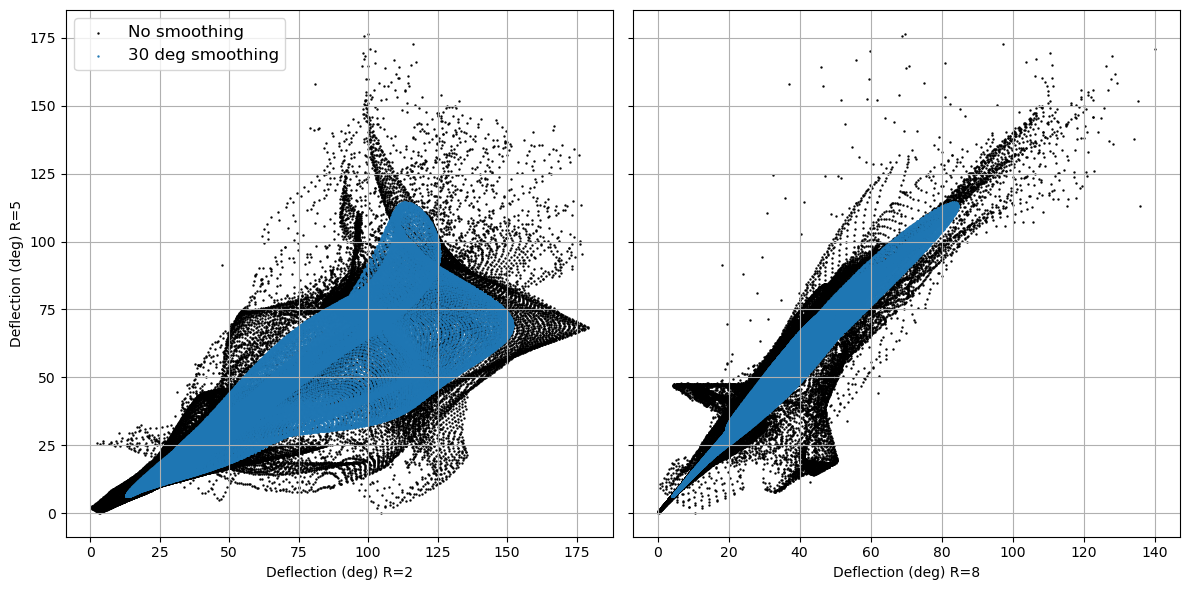

In [13]:
import numpy as np
import healpy as hp
from astropy.io import ascii
import matplotlib.pyplot as plt

def load_deflection_map(rigidity, defl_file, fwhm_deg):
    """Load and smooth deflection map."""
    data = ascii.read(defl_file)
    if defl_file=='../data/deflexiones_R2R5R8_final.txt':
        # add pixid column that starts at 0
        data['pixid'] = np.arange(len(data))
        pixel_ids = np.asarray(data['pixid'], dtype=int)
    else:
        pixel_ids = np.asarray(data['pixid'], dtype=int)
    deflection_data = np.asarray(data[f'deflexion(deg)_R{int(rigidity)}'], dtype=float)
    
    npix = int(np.max(pixel_ids)) + 1
    nside = hp.npix2nside(npix)
    dmap = np.full(npix, hp.UNSEEN, dtype=float)
    dmap[pixel_ids] = deflection_data
    
    if fwhm_deg and fwhm_deg > 0:
        dmap = hp.smoothing(dmap, fwhm=np.radians(fwhm_deg), verbose=False)
    
    return dmap, nside

defl_file = '../data/deflexiones_R2R5R8_final.txt'

# Create subplots that share y-axis
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

# Load all the data
dmap_R2_smooth = load_deflection_map(rigidity=2, defl_file=defl_file, fwhm_deg=30.0)[0]
dmap_R5_smooth = load_deflection_map(rigidity=5, defl_file=defl_file, fwhm_deg=30.0)[0]
dmap_R8_smooth = load_deflection_map(rigidity=8, defl_file=defl_file, fwhm_deg=30.0)[0]
dmap_R2 = load_deflection_map(rigidity=2, defl_file=defl_file, fwhm_deg=0.0)[0]
dmap_R5 = load_deflection_map(rigidity=5, defl_file=defl_file, fwhm_deg=0.0)[0]
dmap_R8 = load_deflection_map(rigidity=8, defl_file=defl_file, fwhm_deg=0.0)[0]

alpha = 1

# Plot on ax1
ax1.scatter(dmap_R2, dmap_R5, c='k', s=.5, alpha=alpha, label='No smoothing')
ax1.scatter(dmap_R2_smooth, dmap_R5_smooth, s=.5, alpha=alpha, label='30 deg smoothing')
ax1.set_ylabel('Deflection (deg) R=5')
ax1.legend(loc='upper left', fontsize=12)

# Plot on ax2
ax2.scatter(dmap_R8, dmap_R5, c='k', s=.5, alpha=alpha, label='No smoothing')
ax2.scatter(dmap_R8_smooth, dmap_R5_smooth, s=.5, alpha=alpha, label='30 deg smoothing')

# Add grids and labels
ax1.grid(True)
ax2.grid(True)
ax1.set_xlabel('Deflection (deg) R=2') 
ax2.set_xlabel('Deflection (deg) R=8') 

# Remove the gap between subplots
plt.subplots_adjust(wspace=0.05)

plt.tight_layout()
plt.savefig('../plots/deflection_scatter_R2R5R8.png', dpi=150)
plt.show()